# Applied Machine Learning (2023), exercises


## General instructions for all exercises

Follow the instructions and fill in your solution under the line marked by tag

> YOUR CODE HERE

Remove also line 

> raise NotImplementedError()

**Do not change other areas of the document**, since it may disturb the autograding of your results!
  
Having written the answer, execute the code cell by and pressing `Shift-Enter` key combination. The code is run, and it may print some information under the code cell. The focus automatically moves to the next cell and you may "execute" that cell by pressing `Shift-Enter` again, until you have reached the code cell which tests your solution. Execute that and follow the feedback. Usually it either says that the solution seems acceptable, or reports some errors. You can go back to your solution, modify it and repeat everything until you are satisfied. Then proceed to the next task.
   
Repeat the process for all tasks.

The notebook may also contain manually graded answers. Write your manually graded answer under the line marked by tag:

> YOUR ANSWER HERE

Manually graded tasks are text in markdown format. It may contain text, pseudocode, or mathematical formulas. You can write formulas with $\LaTeX$-syntax by enclosing the formula with dollar signs (`$`), for example `$f(x)=2 \pi / \alpha$`, will produce $f(x)=2 \pi / \alpha$

When you have passed the tests in the notebook, and you are ready to submit your solutions, validate and submit your solution using the nbgrader tools from the `Nbgrader/Assignment List`-menu.


# Classification exercises


## Satellite image classification

Following satellite image is obtained from Vaasa in 2.6.2021. The image is acquired from European Sentinell 2 satellite by means of multispectral imaging device (MSI). The multispectral camera has acquired the image using 13 different wavelength bands instead of three (RGB) in the normal camera. These images can searched and dowloaded using [Copernicus Open Access Hub](https://scihub.copernicus.eu/dhus/), and preprosessed by using ESA's [SNAP](http://step.esa.int/main/download/) tool. This data is However downloaded by Cem, using his extraordinary [satellite data tool](https://cemmozzy.users.earthengine.app/view/test).


The bands used are 

| Band number | Band name | Wavelength | Region | Remarks |
| ----------- | --------- | -----------| ------ | ------- |
|  1 | B1  |   443 nm | Violet     | Chlorophyll-A |
|  2 | B2  |   490 nm | Cyan       | |
|  3 | B3  |   560 nm | Green      | |
|  4 | B4  |   665 nm | Red        | Chlorophyll_A |
|  5 | B5  |   705 nm | Red        | |
|  6 | B6  |   740 nm | Red        | |
|  7 | B7  |   783 nm | Deep red   | |
|  8 | B8  |   842 nm | NIR        | |
|  9 | B8A |   865 nm | NIR        | |
| 10 | B9  |   945 nm | NIR        | |
| 11 | B10 |  1375 nm | NIR        | |
| 12 | B11 |  1610 nm | NIR        | |
| 13 | B12 |  2190 nm | NIR        | |
| 14 | -   |  -       | –          |Empty      | 
| 15 | -   |  -       | -          |Empty      |
| 16 | -   |  -       | -          | Empty     |

The channels listed above can be used for creating a natural looking RGB-image, as shown below.

![Palosaari](Palosaari.png)

Even though, only three channels are used for RGB image, all 13 can be usefull features for land type and crops classification. 

## Training data 

The training data is obtained from [Dynamic word land usage dataset](https://www.dynamicworld.app). 

The labelled areas are:

| Segment no. | Segment name | Suomeksi | Segment color | 
| ----------- | --------- | -----------| ------ |
|  0 | Water  | Vettä   | Blue |
|  1 | Trees  | Puita tai metsää  | Green |
|  2 | Grass  | Ruohikkoa  | Light green |
|  3 | Crops  | Viljelysmaata  | Brownish Yellow |
|  4 | Shrub  | Pensaikkoa | Yellow |
|  5 | Flooded vegetation | Tulva-alue | Lila |
|  6 | Built up area | Rakennettu alue| Red |
|  7 | Bare ground | Paljas maa | Gray |
|  8 | Snow & Ice  | Lunta ja jäätä | Lila |


## Task 1


### Read the data
Open the data which is in two 32-bit TIFF images. These images need to be opened using imageIo library with LZW compression support. (If you are using your own environment, install imageio and imagecodecs first)

The data is stored in the following images:
 - `20210602_s2.tif`: The Sentinel two spectral image, 800x4817 pixels, each pixel containin 16 32-bit channels.
 - `20210602_dw.tif`: The Dynamic World land use classification data, 800x4817 pixels, each pixel containin one 8-bit integer. Values from 0:15

The opening of the images can be achieved like this:

```python
import imageio as iio
Is2 = iio.v2.imread('20210602_s2.tif')
Idw = iio.v2.imread('20210602_dw.tif')
```

The image is a three dimensional matrix, where the x- and y-dimensions are the pixel locations and the z-dimension is the color channel number.

![satelliteimage](satelliteimage.svg)

Select the Palosaari area by taking a subset from image using only pixels from $y\in[200:800]$ and $x\in[500:1000]$ and store it as `I`.

Select the labels from the Dynamic world image Idw, covering the same area, and store it as a row-vector `l`. 

Plot the image using only channels 1, 2 and 3 to see which area it covers, and plot a histogram of area labels from Dynamic world to see how much there are samples from different areas in the image. Scale the image so that its values are floating point values between 0..1 to display it properly. 

In [44]:
#!pip install imageio
#!pip install imagecodecs

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import the imageio-library which is also capable of reading 32 bit scientific TIFF images
import imageio as iio

In [46]:
Is2 = iio.v2.imread('20210602_s2.tif')
Idw = iio.v2.imread('20210602_dw.tif')

In [47]:
Is2.shape

(800, 4817, 16)

In [48]:
I = Is2[200:800,500:1000,:]

In [49]:
I.shape

(600, 500, 16)

In [50]:
Idw.shape

(800, 4817)

In [51]:
l = Idw[200:800,500:1000].ravel()

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [53]:
x_scaled = scaler.fit_transform(I[:,:,0])

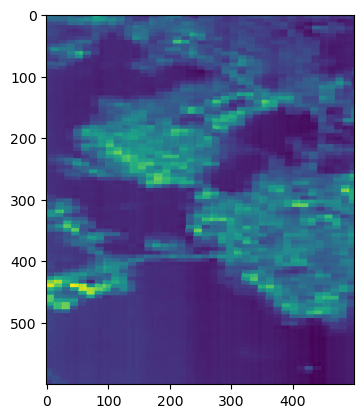

In [54]:
# YOUR CODE HERE
plt.imshow(x_scaled)

(array([[654., 142.,   0., ...,   4.,   0.,   0.],
        [656., 140.,   0., ...,   4.,   0.,   0.],
        [656., 141.,   0., ...,   3.,   0.,   0.],
        ...,
        [236., 522.,   6., ...,   0.,   0.,   0.],
        [236., 518.,   7., ...,   0.,   0.,   0.],
        [236., 517.,   6., ...,   0.,   7.,   0.]]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 4817 BarContainer objects>)

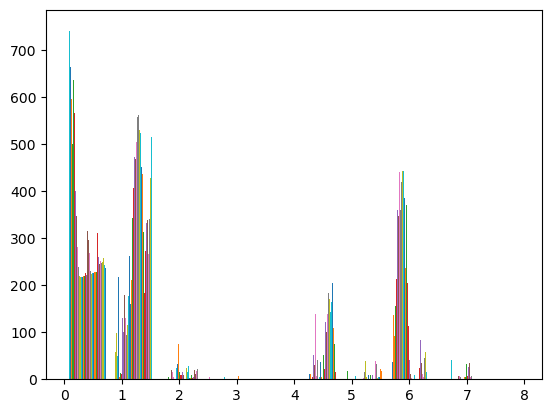

In [55]:
plt.hist(Idw)

In [56]:
#Tests

points=0
if ('Is2' in globals()) and ('l' in globals()):
    points+=1
else:
    print("Please define Is2 and l")
points

1

## Task 2

Construct the design matrix `X`, label vector `y` and split the data to training and testing sets.

Reshape the image data `I` so that is has only one spatial dimension, and first 13 features. Use the `reshape` function of numpy arrays for this purpose. Store your results to design matrix `X`.

Check that your label vector `l` is already a row-vector. If it is not you can use `reshape` or `ravel` -functions of numpy array to convert it to row vector.

Use sklearn function `train_test_split` to randomly split the data into testing set and training set. Normally it is good to use quite large training set, but since we are now using nearest neighbours method, with is slow with large training sets, we will exceptionally split the data so that 1% will be used as a training set and 99% for testing. The function splits both the design matrix `X` and the label vector `y` at the same time, to make it's use very convenient. Store your training sets to variables `X_train`, `y_train` and your testing set to variables `X_test` and `y_test`. 

In [57]:
I.shape

(600, 500, 16)

In [58]:
X = I[:, :, :13].reshape(-1, 13)
y = l

In [59]:
X.shape

(300000, 13)

In [107]:
from sklearn.model_selection import train_test_split

# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=5)

In [109]:
#Tests

points=0
if ('X_train' in globals()) and ('X_test' in globals()) and ('y_train' in globals()) and ('y_test' in globals()):
    points+=0.5
if (X_train.shape == (3000,13)) and (len(y_train)==3000):
    points+=0.5

assert(y.dtype==np.uint8)
points

1.0

## Task 2

Analyze the complexity of the data  by plotting the training set of data with two first principal components

 - Transform the the trainig set data in PCA domain as `pc`
 - Plot a scatter plot of two first principal components, where the color is the label number, the integer representation of `y` (=classes) of the training set
 - Use the `s` (size) parameter to set the size of the dots in scatter plot smaller, to see the data better.

In [62]:
from sklearn.decomposition import PCA
import pandas as pd

In [81]:
D = pd.DataFrame(data=X_train, columns=[f'feature_{i+1}' for i in range(X_train.shape[1])])
D['target'] = y_train

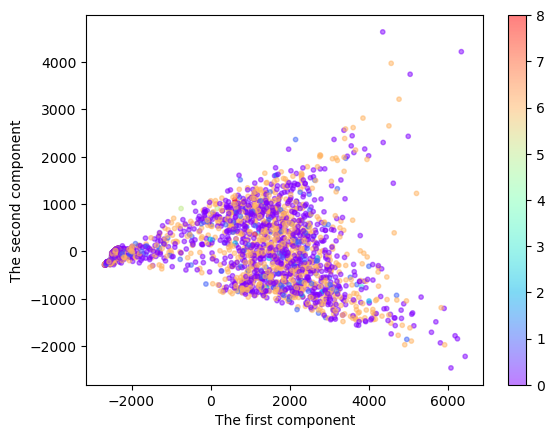

In [110]:
# YOUR CODE HERE
# Transforming training set data as pc
pca=PCA(n_components=2)
pc=pca.fit_transform(D)

# Plotting pca data
plt.scatter(x=pc[:,0], y=pc[:,1], c=y_train, cmap='rainbow', s=10, alpha=0.5)
plt.xlabel('The first component')
plt.ylabel('The second component')
plt.colorbar()

In [111]:
#Tests

assert(pc.shape==(3000, 2)), "Something is wrong with PCA"
assert(max(y_train)<9), "Something is wrong with integer labels"


## Task 3

Define a KNN classifier which assigns each pixel from the image to the correct land use similar way than Dynamic World land use map.

- Create a processing pipeline using standard scaler and KNN classifier, name the pipeline as `predictor`
- Train the pipeline using the training data
- Check if it passes the tests for precision in training set


In [112]:
len(np.unique(y))

9

In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics


#from sklearn ...

#predictor= ...

# YOUR CODE HERE
n_neighbors=9
predictor=Pipeline([
        ('Scaling', StandardScaler()),
        ('KNN', KNeighborsClassifier(n_neighbors))
    ])
predictor.fit(X_train,y_train)
yh=predictor.predict(X_test)

In [114]:
#Tests

# Testing the precision in the training set
yh=predictor.predict(X_train)
train_score=metrics.accuracy_score(y_true=y_train, y_pred=yh)
if len(predictor.steps)<2:
    print("The predictor is not a pipeline. Did you forget scaling?")
assert(len(predictor.steps)>=2)
print(train_score)
assert(train_score > 0.8)


0.9236666666666666


## Task 4: Evaluation of the predictor

Having trained the predictor, evaluate now it's performance using cross validation and test set. You may use `cross_val_score` function from the `sklearn.model_selection` library and `accuracy_score` from the `sklearn.metrics` library.

Print also the confusion matrix to see which areas are miss-classified. Use `confusion_matrix` function from the `sklearn.metrics` library


In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
#
knn = KNeighborsClassifier(n_neighbors = 9)
cv_score= max(cross_val_score(knn, X, y, cv=9))
train_score=accuracy_score(y_true=y_train, y_pred=yh)


# YOUR CODE HERE

In [116]:
print("CV", cv_score)
print("Train", train_score)

CV 0.962679626796268
Train 0.9236666666666666


In [131]:
yh_new = predictor.predict(X_test)

In [132]:
test_score=accuracy_score(y_true=y_test, y_pred=yh_new)

In [135]:
print("CV", cv_score)
print("Train", train_score)
print("Test", test_score)

CV 0.962679626796268
Train 0.9236666666666666
Test 0.9212491582491582


In [136]:
#Tests
assert(cv_score > 0.85)
assert(train_score > 0.85)
assert(test_score > 0.85)

## Task 5: Confusion matrix

Make a confusion matrix of the classifier for training set, store it as `CM` and print it in screen for further analysis.

In [125]:
# YOUR CODE HERE
CM = confusion_matrix(y_train, yh)

In [126]:
print(CM)

[[1373   14    1    0    0   89    0    0]
 [   3  158    1    0    0   61    0    0]
 [   0    3    9    0    0    5    0    0]
 [   0    0    0    0    0    1    0    0]
 [   0    3    0    0    0    1    0    0]
 [  16   25    1    0    0 1231    0    0]
 [   0    0    0    0    0    3    0    0]
 [   2    0    0    0    0    0    0    0]]


In [118]:
CM.shape

(8, 8)

In [119]:
if 'CM' not in globals():
    print("Please store your confusion matrix as variable CM")
assert(CM.shape==(8,8))

## Task 5: Interpretation of the results

1. Describe the precision of the classifier.
2. Is it probable that the classifier suffers from overfitting? Why/Why not?
1. What land cover type had most misclassified samples?


YOUR ANSWER HERE

In [138]:
#1. Precision of the classifier is not very good as it is getting imbalaced train test split
#2. Yes because the training set is getting imbalanced data which causes precision problems
#3. Most misclassified sample is label 0 (Water)